In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravirajsinh45/real-life-industrial-dataset-of-casting-product")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'real-life-industrial-dataset-of-casting-product' dataset.
Path to dataset files: /kaggle/input/real-life-industrial-dataset-of-casting-product


In [54]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_data = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


Found 6633 files belonging to 2 classes.
Found 715 files belonging to 2 classes.


In [55]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


In [56]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


In [57]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [58]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 184s 870ms/step - accuracy: 0.6833 - loss: 0.6179 - val_accuracy: 0.8629 - val_loss: 0.3516
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 188s 904ms/step - accuracy: 0.8509 - loss: 0.3529 - val_accuracy: 0.8769 - val_loss: 0.3038
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 205s 920ms/step - accuracy: 0.8708 - loss: 0.3025 - val_accuracy: 0.8951 - val_loss: 0.2701
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 194s 881ms/step - accuracy: 0.8984 - loss: 0.2594 - val_accuracy: 0.8937 - val_loss: 0.2539
Epoch 5/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 193s 927ms/step - accuracy: 0.9031 - loss: 0.2380 - val_accuracy: 0.9091 - val_loss: 0.2271


In [59]:
model.save("/content/defect_model.keras")
print("Model saved successfully!")



Model saved successfully!


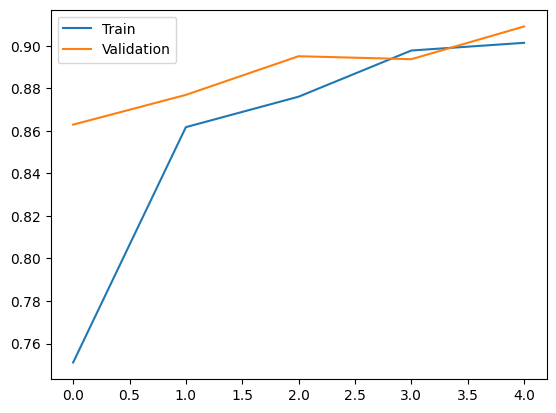

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.show()


In [61]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/defect_model.keras")
print("Model loaded successfully!")


Model loaded successfully!


In [62]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    plt.imshow(img)
    plt.axis("off")

    if prediction[0][0] > 0.5:
        print("Prediction: DEFECTIVE")
    else:
        print("Prediction: OK")
